# ***Airline Passenger Refferel Prediction***
Project Type : Classification
Contributor's name : Md Ismail Quraishi

Problem Statement :
Data includes airline reviews from 2006 to 2009 for popular airlines around the world with multiple choice and free text questions. Data is scraped in the Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data loading
path = "data/data_airline_reviews.xlsx"
df = pd.read_excel(path)

In [3]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print('Shape :', df.shape)
print()
print('Columns :')
print(list(df.columns))
print()
print('Duplicated row count', df.duplicated().sum())

Shape : (131895, 17)

Columns :
['airline', 'overall', 'author', 'review_date', 'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'recommended']

Duplicated row count 70711


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [6]:
df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
df.isna().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

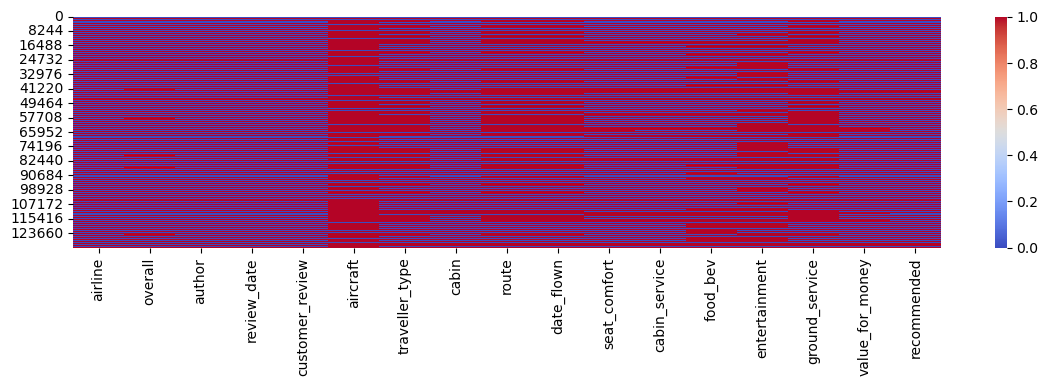

In [8]:
plt.rcParams['figure.figsize'] = (14,3)
sns.heatmap(df.isna(), cmap='coolwarm')
plt.show()

In [9]:
df[df['airline'].isna() == True].info()

<class 'pandas.core.frame.DataFrame'>
Index: 65948 entries, 0 to 131893
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          0 non-null      object 
 1   overall          0 non-null      float64
 2   author           0 non-null      object 
 3   review_date      0 non-null      object 
 4   customer_review  0 non-null      object 
 5   aircraft         0 non-null      object 
 6   traveller_type   0 non-null      object 
 7   cabin            0 non-null      object 
 8   route            0 non-null      object 
 9   date_flown       0 non-null      object 
 10  seat_comfort     0 non-null      float64
 11  cabin_service    0 non-null      float64
 12  food_bev         0 non-null      float64
 13  entertainment    0 non-null      float64
 14  ground_service   0 non-null      float64
 15  value_for_money  0 non-null      float64
 16  recommended      0 non-null      object 
dtypes: float64(7), o